In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read pokemon.csv: df
df = pd.read_csv('pokemon.csv')

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
# describe object data types
df.describe(include='O')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Rufflet,Water,Flying
freq,1,112,97


### Checking for Missing Values

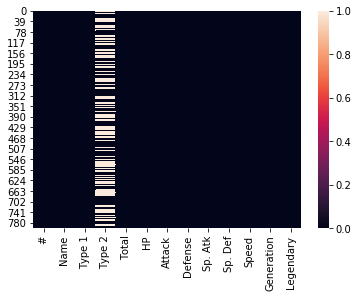

In [9]:
sns.heatmap(df.isnull())

There are many missing values in Type 2 column. We will fill those missing values with Type 1

In [10]:
df['Type 2'] = df['Type 2'].fillna(df['Type 1'])

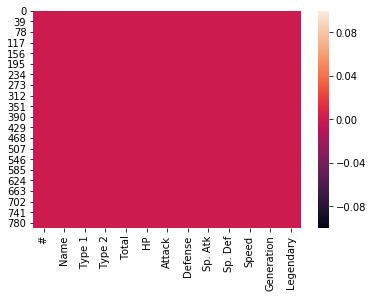

In [11]:
sns.heatmap(df.isnull())

As we can see, now there is no missing value in the dataset. We are ready to the next step.

### Encode data Type 1 and Type 2
type 1 and type 2 are actually categorical data. However, they are still in the form of string and both of them has 18 unique values. It will give us too many columns if we use One Hot Encoder. So in this project we will use, binary encoder

In [13]:
# import BinaryEncoder
from category_encoders import BinaryEncoder

In [14]:
# Initiate BinaryEncoder object : binEnc
binEnc = BinaryEncoder(cols=['Type 1', 'Type 2'], drop_invariant=True)

In [16]:
# fit transform df: df_encode
df_encode = binEnc.fit_transform(df)

### Defining X and y for feature and target to use in Model
The purpose of this project is to predict whether a pokemon is legendary or not. The features are every single column with numerical value (except # column), and Type 1 and Type 2 that have been encoded by binary encoder.

In [17]:
# Feature and target preparation
X = df_encode.drop(['Name', 'Legendary', '#'], axis=1)
y = df_encode['Legendary']

### Modeling with Cross Validation (CV)
We will use Cross Validation to see the accuracy of the prediction model

In [18]:
# improt packages that necessary for Cross Validation
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [19]:
# model 1 : Logistic Regression
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
lr_cv = cross_val_score(lr, X, y, cv=10, scoring='accuracy').mean()
lr_cv

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

0.9225503984997655

The accuracy is pretty good, but let's see the recall

In [29]:
lr_cv_recall = cross_val_score(lr, X, y, cv=10, scoring='recall').mean()
lr_cv_recall

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

0.2261904761904762

In [30]:
y.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

Recall is bad, it is because our data is imbalance, too many data with non-legendary pokemon

<b> KFold </b>

In [35]:
kf = KFold(n_splits=8, shuffle=True)

In [36]:
num = 1
for train_index, test_index in kf.split(X,y):
    print(f'=============== Iteration {num}=========================')
    print(f'TRAIN INDEX {num}')
    print(train_index)
    print(f'TEST INDEX {num}')
    print(test_index)
    num += 1

=============== Iteration 1=========================
TRAIN INDEX 1
[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  37  38
  39  40  41  42  43  44  45  46  47  48  50  51  52  54  55  56  58  59
  61  62  64  65  66  67  68  69  70  72  75  76  77  78  79  82  83  84
  85  86  87  88  90  91  93  94  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 112 113 114 115 116 117 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 162 164
 167 169 170 172 174 175 176 178 179 180 181 182 183 184 185 186 188 190
 191 193 194 195 196 197 198 199 200 201 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227 228 229
 230 231 232 233 234 235 237 238 239 240 242 243 244 245 246 247 248 249
 250 251 253 254 255 256 257 258 259 260 261 262 263 264 

KFold can split data into train and test split. We can also configure the number of split. After that, we can customize the scoring method we want to use.

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, log_loss, roc_auc_score, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
# Create function called cv_reports for KFold, accept 4 parameters (X, y, n_splits, and model).
# Return dataframe with train and test score ('Matt Corr Coef', 'Log Loss', 'Recall', 'Precision', 'Roc Auc', 'F1', 'Accuracy')
def cv_reports(X, y, n_splits, model):
    kf = KFold(n_splits=n_splits, shuffle=True)
    num = 1
    list_score = []
    index_name = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        y_test_pred_proba = model.predict_proba(X_test)
        y_train_pred_proba = model.predict_proba(X_train)
        list_metrics = [matthews_corrcoef, log_loss, recall_score, precision_score, roc_auc_score, f1_score, accuracy_score]
        list_name = ['Matt Corr Coef', 'Log Loss', 'Recall', 'Precision', 'Roc Auc', 'F1', 'Accuracy']
        index_name.append(f'Iterration-{num}')
        metrics = {}
        for i, item in enumerate(list_metrics):
            if list_name[i] != 'roc_auc':
                metrics[f'{list_name[i]} Train'] = item(y_train, y_train_pred)
                metrics[f'{list_name[i]} Test'] = item(y_test, y_test_pred)
            else:
                metrics[f'{list_name[i]} Train'] = item(y_train, y_train_pred_proba[:,1])
                metrics[f'{list_name[i]} Test'] = item(y_test, y_test_pred_proba[:,1])
        list_score.append(metrics)
        num += 1
    df = pd.DataFrame(list_score, index=index_name)
    list_avg = []
    for col in df.columns:
        list_avg.append(df[col].mean())
    df.loc['Average'] = list_avg
    return df

In [63]:
# How to use the cv_reports function
# first we have to initiate model, the model can be anything for classification model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
cv_reports(X, y, 8, gb)

,Accuracy Test,Accuracy Train,F1 Test,F1 Train,Log Loss Test,Log Loss Train,Matt Corr Coef Test,Matt Corr Coef Train,Precision Test,Precision Train,Recall Test,Recall Train,Roc Auc Test,Roc Auc Train
Iterration-1,0.9700,0.998571,0.727273,0.991870,1.036187,4.934225e-02,0.744024,0.991126,0.571429,0.983871,1.000000,1.000000,0.984375,0.999218
Iterration-2,0.9600,0.998571,0.500000,0.991870,1.381575,4.934111e-02,0.497598,0.991126,0.400000,1.000000,0.666667,0.983871,0.817869,0.991935
Iterration-3,0.9900,1.000000,0.965517,1.000000,0.345388,9.992007e-16,0.960459,1.000000,1.000000,1.000000,0.933333,1.000000,0.966667,1.000000
Iterration-4,0.9200,1.000000,0.600000,1.000000,2.763118,9.992007e-16,0.571689,1.000000,0.750000,1.000000,0.500000,1.000000,0.738636,1.000000
Iterration-5,0.9800,0.997143,0.833333,0.983333,0.690784,9.868450e-02,0.822695,0.981934,0.833333,0.967213,0.833333,1.000000,0.911348,0.998440
Iterration-6,0.9600,1.000000,0.818182,1.000000,1.381575,9.992007e-16,0.800095,1.000000,0.750000,1.000000,0.900000,1.000000,0.933333,1.000000
Iterration-7,0.9600,0.998571,0.777778,0.991304,1.381575,4.934225e-02,0.761783,0.990571,0.700000,0.982759,0.875000,1.000000,0.921196,0.999222
Iterration-8,0.9200,1.000000,0.333333,1.000000,2.763126,9.992007e-16,0.296720,1.000000,0.400000,1.000000,0.285714,1.000000,0.626728,1.000000
Average,0.9575,0.999107,0.694427,0.994797,1.467916,3.083876e-02,0.681883,0.994345,0.675595,0.991730,0.749256,0.997984,0.862519,0.998602
